## Fashion Mnist

### MNIST 패션 이미지를 CNN을 이용하여 분류하세요. CNN을 이용한 분류 결과를 MLP와 비교해보세요.


In [10]:
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import pandas as pd

#### MLP

In [16]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

# preprocessing
X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [17]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 60s 1ms/step - loss: 0.5751 - acc: 0.7940 - val_loss: 0.7241 - val_acc: 0.7552
Epoch 2/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.4218 - acc: 0.8508 - val_loss: 0.3761 - val_acc: 0.8656
Epoch 3/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.3835 - acc: 0.8655 - val_loss: 0.4576 - val_acc: 0.8304
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.3638 - acc: 0.8722 - val_loss: 0.3856 - val_acc: 0.8586
Epoch 5/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.3448 - acc: 0.8773 - val_loss: 0.3435 - val_acc: 0.8749
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.3401 - acc: 0.8794 - val_loss: 0.3744 - val_acc: 0.8577
Epoch 7/10
50000/50000 [==============================] - 78s 2ms/step - loss: 0.3339 - acc: 0.8804 - val_loss: 0.3432 - val_acc

In [20]:
test_loss, test_acc = net.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 244us/step


In [21]:
test_acc

0.8651000261306763

#### CNN

In [3]:
(Q_train, w_train), (Q_test, w_test) = fashion_mnist.load_data()

# preprocessing
Q_train = Q_train.reshape((60000, 28, 28, 1))
Q_train = Q_train.astype('float32') / 255

Q_test = Q_test.reshape((10000, 28, 28, 1))
Q_test = Q_test.astype('float32') / 255

w_train=to_categorical(w_train)
w_test=to_categorical(w_test)

Q_val = Q_train[:10000]
partial_Q_train = Q_train[10000:]

w_val = w_train[:10000]
partial_w_train = w_train[10000:]

In [4]:
nel = models.Sequential()
nel.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
nel.add(layers.MaxPooling2D((2,2)))
nel.add(layers.Conv2D(64,(3,3), activation='relu')) 
nel.add(layers.MaxPooling2D((2,2)))
nel.add(layers.Conv2D(64,(3,3), activation='relu'))
nel.add(layers.Flatten())
nel.add(layers.Dense(512, activation='relu')) 
nel.add(layers.Dropout(0.5)) 
nel.add(layers.Dense(64, activation='relu')) 
nel.add(layers.Dropout(0.5))
nel.add(layers.Dense(10, activation='softmax')) 
nel.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [5]:
val= nel.fit(partial_Q_train,partial_w_train,epochs=10, batch_size=64, validation_data=(Q_val, w_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 103s 2ms/step - loss: 0.6465 - acc: 0.7662 - val_loss: 0.5622 - val_acc: 0.8008
Epoch 2/10
50000/50000 [==============================] - 87s 2ms/step - loss: 0.4078 - acc: 0.8588 - val_loss: 0.3681 - val_acc: 0.8595
Epoch 3/10
50000/50000 [==============================] - 96s 2ms/step - loss: 0.3511 - acc: 0.8777 - val_loss: 0.3094 - val_acc: 0.8893
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/step - loss: 0.2949 - acc: 0.8987 - val_loss: 0.2738 - val_acc: 0.9027
Epoch 6/10
50000/50000 [==============================] - 82s 2ms/step - loss: 0.2771 - acc: 0.9026 - val_loss: 0.2792 - val_acc: 0.8950
Epoch 7/10
50000/50000 [==============================] - 81s 2ms/step - loss: 0.2479 - acc: 0.9113 - val_loss: 0.2667 - val_acc: 0.9076
Epoch 9/10
50000/50000 [==============================] - 88s 2ms/step - loss: 0.2401 - acc: 0.9151 - val_loss: 0.2991 - val_ac

In [11]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

Text(0.5, 1.0, 'loss by epoches')

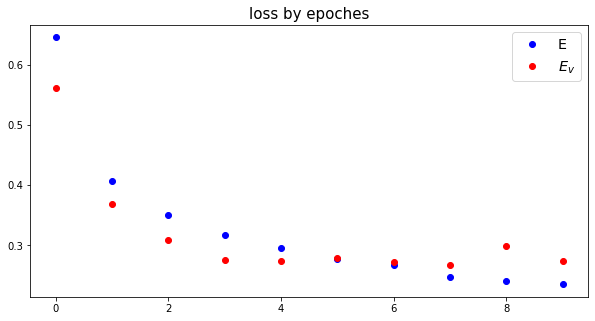

In [33]:
x = np.arange(0,len(loss))
plt.figure(figsize=(10,5))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.legend(fontsize='x-large')
plt.title("loss by epoches", fontsize='15')

Text(0.5, 1.0, 'accruary by epoches')

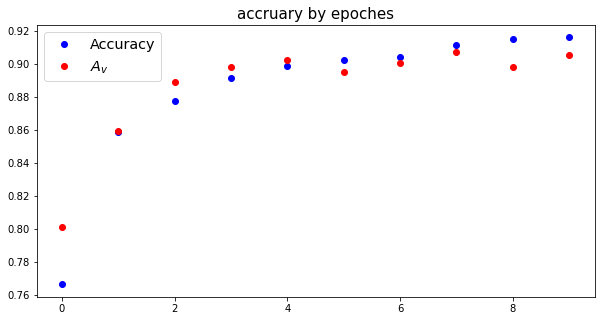

In [34]:
plt.figure(figsize=(10,5))
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo', label='Accuracy')
plt.plot(x,val_acc,'ro', label='$A_v$')
plt.legend(fontsize='x-large')
plt.title("accruary by epoches", fontsize=15)

In [39]:
test_loss, test_acc = nel.evaluate(Q_test,w_test)

10000/10000 [==============================] - 5s 535us/step


In [40]:
test_acc

0.8985000252723694

In [44]:
df = pd.DataFrame(data=np.array([['86.5%'], ['89.8%']]), index= ['MLP', 'CNN'], columns=['Test Data Accuracy'])
display(df)


,Test Data Accuracy
MLP,86.5%
CNN,89.8%


### ※결론
**MLP보다 CNN을 이용한 기법이 정확도가 좀 더 높게 나왔습니다.
아무래도 합성곱을 이용한 이미지 분석이 정확도를 높이는데 많은 기여를 한 것 같습니다.**